# Basic Features and Readability Scores

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Introduction to NLP feature engineering

### Numerical data

For any ML algorithm, data fed into it must be in tabular form and all the training features must be numerical.

|**sepal length**|**sepal width**|**petal length**|**petal width**|   **class**   |
|----------------|---------------|----------------|---------------|---------------|
|       6.3      |      2.9      |      5.6       |      1.8      |Iris-virginica |
|       4.9      |      3.0      |      1.4       |      0.2      |  Iris-setosa  |
|       5.6      |      2.9      |      3.6       |      1.3      |Iris-versicolor|
|       6.0      |      2.7      |      5.1       |      1.6      |Iris-versicolor|
|       7.2      |      3.6      |      6.1       |      2.5      |Iris-virginica |

### One-hot encoding

ML algorithms can also work with categorical data provided they are converted into numerical form through **one-hot encoding**.

|**sex**|**one-hot encoding**|**sex_female**|**sex-male**|
|-------|--------------------|--------------|------------|
|female|-->|1|0|
|male|-->|0|1|
|female|-->|1|0|
|male|-->|0|1|
|female|-->|1|0|
|...|...|...|...|

### One-hot encoding with pandas

```python
# Import the pandas library
import pandas as pd

# Perform one-hot encoding on the 'sex' feature of df
df = pd.get_dummies(df, columns=['sex'])
```

### Textual data
#### Movie Review Dataset

|**review**|**class**|
|----------|---------|
| This movie is for dog lovers. A very poignant... | positive |
| The movie is forgettable. The plot lacked... | negative |
| A truly amazing movie about dogs. A gripping... | positive |

Consider a movie reviews dataset. This data cannot be utilized by any machine learning algorithm. The training feature 'review' isn't numerical. Neither is it categorical to perform one-hot encoding on.

### Text pre-processing

We need to perform two steps to make this dataset suitable for ML.

1- **Standardize the text**:
- Converting to lowercase
    * Example: <code style="background:#RRGGBB">Reduction</code> to <code style="background:#RRGGBB">reduction</code>
- Converting to base-form
    * Example: <code style="background:#RRGGBB">reduction</code> to <code style="background:#RRGGBB">reduce</code>
    
### Vectorization
After preprocessing, the reviews are converted into a set of numerical training features through a process known as **vectorization**.

After vectorization, our original review dataset gets converted into something like this:

|**0**|**1**|**2**|**...**|**n**|   **class**   |
|-----|-----|-----|-------|-----|---------------|
|       0.03      |      0.71      |      0.00       |      ...      |       0.22       |       positive       |
|       0.45      |      0.00      |      0.03       |      ...      |       0.19       |       negative       |
|       0.14      |      0.18      |      0.00       |      ...      |       0.45       |       positive       |

### Basic features

We can also extract certain basic features from text:
- Number of words
- Number of characters
- Average length of words


When working with niche data such as Tweets, it may also be useful to know how many hashtags have been used in a tweet.

### POS tagging

So far, we have seen how to extract features out of an entire body of text.

Some NLP applications may require you to extract features for individual words. For instance, you may want to do **parts-of-speech tagging (POS tagging)** to know the different parts-of-speech present in your text as shown.

| **Word** | **POS** |
|----------|---------|
|     I    | Pronoun |
|   have   |   Verb  |
|     a    | Article |
|    dog   |   Noun  |

### Named Entity Recognition

You may also want to know perform **named entity recognition** to find out if a particular noun is referring to a person, organization or country.

**Example**: "Brian works at DataCamp."

| **Noun** |    **NER**     |
|----------|----------------|
|   Brian  |   **Person**   |
| DataCamp |**Organization**|

### Concepts covered

- Text Preprocessing
- Basic Features
- Word Features
- Vectorization

In [2]:
feature_1 = pd.Series([29.0000, 0.9167, 2.0000, 30.0000, 25.0000, 48.0000, 63.0000, 39.0000, 53.0000, 71.0000, 47.0000, 18.0000, 24.0000, 26.0000, 80.0000], name='feature 1')
feature_2 = pd.Series([0, 1, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 0, 0, 0], name='feature 2')
feature_3 = pd.Series([0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], name='feature 3')
feature_4 = pd.Series([29.0000, 0.9167, 2.0000, 30.0000, 25.0000, 48.0000, 63.0000, 39.0000, 53.0000, 71.0000, 47.0000, 18.0000, 24.0000, 26.0000, 80.0000], name='feature 4')
feature_5 = pd.Series(['female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'female', 'female', 'male'], name='feature 5')
label = pd.Series([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1], name='label')

df1 = pd.DataFrame([feature_1, feature_2, feature_3, feature_4, feature_5, label]).T

In [3]:
# Print the features of df1
print(df1.columns)

# Perform one-hot encoding
df1 = pd.get_dummies(df1, columns=['feature 5'])

# Print the new features of df1
print(df1.columns)

# Print first five rows of df1
display(df1.head())

Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5',
       'label'],
      dtype='object')
Index(['feature 1', 'feature 2', 'feature 3', 'feature 4', 'label',
       'feature 5_female', 'feature 5_male'],
      dtype='object')


,feature 1,feature 2,feature 3,feature 4,label,feature 5_female,feature 5_male
0,29.0,0,0,29.0,1,1,0
1,0.9167,1,2,0.9167,1,0,1
2,2.0,1,2,2.0,0,1,0
3,30.0,1,2,30.0,0,0,1
4,25.0,1,2,25.0,0,1,0


## Basic feature extraction

### Number of characters

The most basic feature we can extract from text is the **number of characters**, including whitespaces.

In [4]:
# Compute the number of characters
text = "I don't know."
num_char = len(text)

# Print the number of characters
print(num_char)

13


If our DataFrame has a textual feature (say 'review'), we can compute the number of characters for each review and store it as a new feature 'num_chars' by using the pandas DataFrame **apply** method.

```python
# Create a 'num_chars' feature
df['num_chars'] = df['review'].apply(len)
```

### Number of words

Assuming that every word is seperated by a space, we can use a string's **split()** method to convert it into a list where every element is a word.

In [5]:
# Split the string into words
text = "Mary had a little lamb."
words = text.split()

# Print the list containing words
print(words)

# Print the number of words
print(len(words))

['Mary', 'had', 'a', 'little', 'lamb.']
5


To do this for a textual feature in a DataFrame, we first define a function that takes in a string as an argument and returns the number of words in it. The steps followed inside the function are similar as before.

We then pass this function **word_count** into **apply**.

```python
# Function that returns number of words in a string
def word_count(string):
    # Split the string into words
    words = string.split()
    
    # Return the length of words list
    return len(words)

# Create num_words feature in df
df['num_words'] = df['review'].apply(word_count)
```

### Average word length

```python
# Function that returns average word length
def avg_word_length(x):
    # Split the string into words
    words = x.split()
    # Compute length of each word and store it in a separate list
    word_lengths = [len(word) for word in words]
    # Compute average word length
    avg_word_length = sum(word_lengths)/len(words)
    # Return average word length
    return(avg_word_length)

# Create a new feature avg_word_length
df['avg_word_length'] = df['review'].apply(avg_word_length)
```

### Special features

When working with data such as tweets, it maybe useful to compute the number of hashtags or mentions used.

### Hashtags and mentions

In [6]:
# Function that returns number of hashtags
def hashtag_count(string):
    # Split the string into words
    words = string.split()
    # Create a list of hashtags
    hashtags = [word for word in words if word.startswith('#')]
    # Return number of hashtags
    return len(hashtags)

In [7]:
hashtag_count("@janedoe This is my first tweet! #FirstTweet #Happy")

2

### Other features
- Number of sentences
- Number of paragraphs
- Words starting with an uppercase
- All-capital words
- Numeric quantities

#### Exercise: Character count of Russian tweets

In [8]:
tweets = pd.read_csv('russian_tweets.csv')

# Create a feature char_count
tweets['char_count'] = tweets['content'].apply(len)

# Print the average character count
print(tweets['char_count'].mean())

103.462


#### Exercise: Word count of TED talks

In [9]:
ted = pd.read_csv('ted.csv')

# Function that returns number of words in a string
def count_words(string):
    # Split the string into words
    words = string.split()
    
    # Return the number of words
    return len(words)

# Create a new feature word_count
ted['word_count'] = ted['transcript'].apply(count_words)

# Print the average word count of the talks
print(ted['word_count'].mean())

1987.1


#### Exercise: Hashtags and mentions in Russian tweets

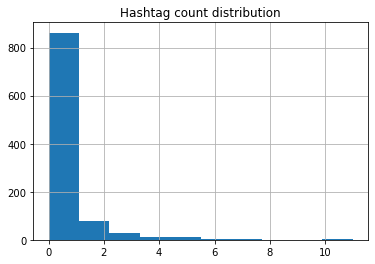

In [10]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['content'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

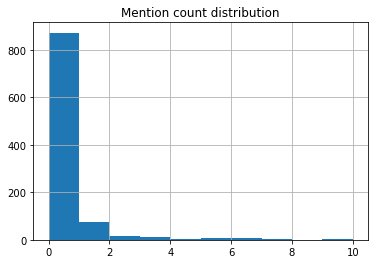

In [11]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['content'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Mention count distribution')
plt.show()

## Readability tests

### Overview of readability tests
- Determine **readability** of an English passage (in other words, it indicates at what educational level a person needs to be in, in order to comprehend a particular piece of text)
- Scale ranging from primary school up to college graduate level
- A mathematical formula utilizing word, syllable and sentence count
- Used in fake news and opinion spam detection

### Readability text examples

Tests that are used for texts in English:
- **Flesch reading ease**
- **Gunning fog index**
- Simple Measure of Gobbledygook (SMOG)
- Dale-Chall score

Tests for other languages also exist that take into consideration the nuances of that particular language.

### Flesch reading ease
- One of the oldest and most widely used tests
- Dependent on two factors:
    - **Greater the average sentence length, harder the text is to read**
        - "This is a short sentence."
        - "This is a longer sentence with more words and it is harder to follow that the first sentence."
    - **Greater the average number of syllables in a word, harder the text is to read**
        - "I live in my home."
        - "I reside in my domicile."
        
- Higher the score, greater the readability

### Flesh reading ease score interpretation

| **Reading ease score** | **Grade Level** |
|------------------------|-----------------|
|90-100|5|
|80-90|6|
|70-80|7|
|60-70|8-9|
|50-60|10-12|
|30-50|College|
|0-30|College Graduate|

### Gunning fog index
- Developed in 1954
- Also dependent on average sentence length
- Greater the percentage of complex words, harder the text is to read
- Higher the index, lesser the readability

### Gunning fog index interpretation

| **Fog index** | **Grade Level** |
|---------------|-----------------|
|17|College graduate|
|16|College senior|
|15|College junior|
|14|College sophomore|
|13|College freshman|
|12|High school senior|
|11|High school junior|
|10|High school sophomore|
|9|High school freshman|
|8|Eighth grade|
|7|Seventh grade|
|6|Sixth grade|

### The textatistic library

We can conduct these readability tests in Python using the **Textatistic** library.

In [12]:
sisyphus_essay = '\nThe gods had condemned Sisyphus to ceaselessly rolling a rock to the top of a mountain, whence the stone would fall back of its own weight. They had thought with some reason that there is no more dreadful punishment than futile and hopeless labor. If one believes Homer, Sisyphus was the wisest and most prudent of mortals. According to another tradition, however, he was disposed to practice the profession of highwayman. I see no contradiction in this. Opinions differ as to the reasons why he became the futile laborer of the underworld. To begin with, he is accused of a certain levity in regard to the gods. He stole their secrets. Egina, the daughter of Esopus, was carried off by Jupiter. The father was shocked by that disappearance and complained to Sisyphus. He, who knew of the abduction, offered to tell about it on condition that Esopus would give water to the citadel of Corinth. To the celestial thunderbolts he preferred the benediction of water. He was punished for this in the underworld. Homer tells us also that Sisyphus had put Death in chains. Pluto could not endure the sight of his deserted, silent empire. He dispatched the god of war, who liberated Death from the hands of her conqueror. It is said that Sisyphus, being near to death, rashly wanted to test his wife\'s love. He ordered her to cast his unburied body into the middle of the public square. Sisyphus woke up in the underworld. And there, annoyed by an obedience so contrary to human love, he obtained from Pluto permission to return to earth in order to chastise his wife. But when he had seen again the face of this world, enjoyed water and sun, warm stones and the sea, he no longer wanted to go back to the infernal darkness. Recalls, signs of anger, warnings were of no avail. Many years more he lived facing the curve of the gulf, the sparkling sea, and the smiles of earth. A decree of the gods was necessary. Mercury came and seized the impudent man by the collar and, snatching him from his joys, lead him forcibly back to the underworld, where his rock was ready for him. You have already grasped that Sisyphus is the absurd hero. He is, as much through his passions as through his torture. His scorn of the gods, his hatred of death, and his passion for life won him that unspeakable penalty in which the whole being is exerted toward accomplishing nothing. This is the price that must be paid for the passions of this earth. Nothing is told us about Sisyphus in the underworld. Myths are made for the imagination to breathe life into them. As for this myth, one sees merely the whole effort of a body straining to raise the huge stone, to roll it, and push it up a slope a hundred times over; one sees the face screwed up, the cheek tight against the stone, the shoulder bracing the clay-covered mass, the foot wedging it, the fresh start with arms outstretched, the wholly human security of two earth-clotted hands. At the very end of his long effort measured by skyless space and time without depth, the purpose is achieved. Then Sisyphus watches the stone rush down in a few moments toward tlower world whence he will have to push it up again toward the summit. He goes back down to the plain. It is during that return, that pause, that Sisyphus interests me. A face that toils so close to stones is already stone itself! I see that man going back down with a heavy yet measured step toward the torment of which he will never know the end. That hour like a breathing-space which returns as surely as his suffering, that is the hour of consciousness. At each of those moments when he leaves the heights and gradually sinks toward the lairs of the gods, he is superior to his fate. He is stronger than his rock. If this myth is tragic, that is because its hero is conscious. Where would his torture be, indeed, if at every step the hope of succeeding upheld him? The workman of today works everyday in his life at the same tasks, and his fate is no less absurd. But it is tragic only at the rare moments when it becomes conscious. Sisyphus, proletarian of the gods, powerless and rebellious, knows the whole extent of his wretched condition: it is what he thinks of during his descent. The lucidity that was to constitute his torture at the same time crowns his victory. There is no fate that can not be surmounted by scorn. If the descent is thus sometimes performed in sorrow, it can also take place in joy. This word is not too much. Again I fancy Sisyphus returning toward his rock, and the sorrow was in the beginning. When the images of earth cling too tightly to memory, when the call of happiness becomes too insistent, it happens that melancholy arises in man\'s heart: this is the rock\'s victory, this is the rock itself. The boundless grief is too heavy to bear. These are our nights of Gethsemane. But crushing truths perish from being acknowledged. Thus, Edipus at the outset obeys fate without knowing it. But from the moment he knows, his tragedy begins. Yet at the same moment, blind and desperate, he realizes that the only bond linking him to the world is the cool hand of a girl. Then a tremendous remark rings out: "Despite so many ordeals, my advanced age and the nobility of my soul make me conclude that all is well." Sophocles\' Edipus, like Dostoevsky\'s Kirilov, thus gives the recipe for the absurd victory. Ancient wisdom confirms modern heroism. One does not discover the absurd without being tempted to write a manual of happiness. "What!---by such narrow ways--?" There is but one world, however. Happiness and the absurd are two sons of the same earth. They are inseparable. It would be a mistake to say that happiness necessarily springs from the absurd. Discovery. It happens as well that the felling of the absurd springs from happiness. "I conclude that all is well," says Edipus, and that remark is sacred. It echoes in the wild and limited universe of man. It teaches that all is not, has not been, exhausted. It drives out of this world a god who had come into it with dissatisfaction and a preference for futile suffering. It makes of fate a human matter, which must be settled among men. All Sisyphus\' silent joy is contained therein. His fate belongs to him. His rock is a thing. Likewise, the absurd man, when he contemplates his torment, silences all the idols. In the universe suddenly restored to its silence, the myriad wondering little voices of the earth rise up. Unconscious, secret calls, invitations from all the faces, they are the necessary reverse and price of victory. There is no sun without shadow, and it is essential to know the night. The absurd man says yes and his efforts will henceforth be unceasing. If there is a personal fate, there is no higher destiny, or at least there is, but one which he concludes is inevitable and despicable. For the rest, he knows himself to be the master of his days. At that subtle moment when man glances backward over his life, Sisyphus returning toward his rock, in that slight pivoting he contemplates that series of unrelated actions which become his fate, created by him, combined under his memory\'s eye and soon sealed by his death. Thus, convinced of the wholly human origin of all that is human, a blind man eager to see who knows that the night has no end, he is still on the go. The rock is still rolling. I leave Sisyphus at the foot of the mountain! One always finds one\'s burden again. But Sisyphus teaches the higher fidelity that negates the gods and raises rocks. He too concludes that all is well. This universe henceforth without a master seems to him neither sterile nor futile. Each atom of that stone, each mineral flake of that night filled mountain, in itself forms a world. The struggle itself toward the heights is enough to fill a man\'s heart. One must imagine Sisyphus happy.\n'

# Import the Textatistic class
from textatistic import Textatistic

# Create a Textatistic Object
readability_scores = Textatistic(sisyphus_essay).scores

# Generate scores
print(f"The Flesch Reading Ease is {readability_scores['flesch_score']:.2f}")
print(f"The Gunning Fog Index is {readability_scores['gunningfog_score']:.2f}")

The Flesch Reading Ease is 81.67
The Gunning Fog Index is 7.91


#### Exercise: Readability of various publications

The excerpts are available as the following strings:

<code style="background:#RRGGBB">forbes</code> - An excerpt from an article from Forbes magazine on the Chinese social credit score system.

<code style="background:#RRGGBB">harvard_law</code> - An excerpt from a book review published in Harvard Law Review.

<code style="background:#RRGGBB">r_digest</code> - An excerpt from a Reader's Digest article on flight turbulence.

<code style="background:#RRGGBB">time_kids</code> - An excerpt from an article on the ill effects of salt consumption published in TIME for Kids.

In [13]:
forbes = '\nThe idea is to create more transparency about companies and individuals that are breaking the law or are non-compliant with official obligations and incentivize the right behaviors with the overall goal of improving governance and market order. The Chinese Communist Party intends the social credit score system to “allow the trustworthy to roam freely under heaven while making it hard for the discredited to take a single step.” Even though the system is still under development it currently plays out in real life in myriad ways for private citizens, businesses and government officials. Generally, higher credit scores give people a variety of advantages. Individuals are often given perks such as discounted energy bills and access or better visibility on dating websites. Often, those with higher social credit scores are able to forgo deposits on rental properties, bicycles, and umbrellas. They can even get better travel deals. In addition, Chinese hospitals are currently experimenting with social credit scores. A social credit score above 650 at one hospital allows an individual to see a doctor without lining up to pay.\n'
harvard_law = '\nIn his important new book, The Schoolhouse Gate: Public Education, the Supreme Court, and the Battle for the American Mind, Professor Justin Driver reminds us that private controversies that arise within the confines of public schools are part of a broader historical arc — one that tracks a range of cultural and intellectual flashpoints in U.S. history. Moreover, Driver explains, these tensions are reflected in constitutional law, and indeed in the history and jurisprudence of the Supreme Court. As such, debates that arise in the context of public education are not simply about the conflict between academic freedom, public safety, and student rights. They mirror our persistent struggle to reconcile our interest in fostering a pluralistic society, rooted in the ideal of individual autonomy, with our desire to cultivate a sense of national unity and shared identity (or, put differently, our effort to reconcile our desire to forge common norms of citizenship with our fear of state indoctrination and overencroachment). In this regard, these debates reflect the unique role that both the school and the courts have played in defining and enforcing the boundaries of American citizenship. \n'
r_digest = '\nThis week 30 passengers were reportedly injured when a Turkish Airlines flight landing at John F. Kennedy International Airport encountered turbulent conditions. Injuries included bruises, bloody noses, and broken bones. In mid-February, a Delta Airlines flight made an emergency landing to assist three passengers in getting to the nearest hospital after some sudden and unexpected turbulence. Doctors treated 15 passengers after a flight from Miami to Buenos Aires last October for everything from severe bruising to nosebleeds after the plane caught some rough winds over Brazil. In 2016, 23 passengers were injured on a United Airlines flight after severe turbulence threw people into the cabin ceiling. The list goes on. Turbulence has been become increasingly common, with painful outcomes for those on board. And more costly to the airlines, too. Forbes estimates that the cost of turbulence has risen to over $500 million each year in damages and delays. And there are no signs the increase in turbulence will be stopping anytime soon.\n'
time_kids = '\nThat, of course, is easier said than done. The more you eat salty foods, the more you develop a taste for them. The key to changing your diet is to start small. “Small changes in sodium in foods are not usually noticed,” Quader says. Eventually, she adds, the effort will reset a kid’s taste buds so the salt cravings stop. Bridget Murphy is a dietitian at New York University’s Langone Medical Center. She suggests kids try adding spices to their food instead of salt. Eating fruits and veggies and cutting back on packaged foods will also help. Need a little inspiration? Murphy offers this tip: Focus on the immediate effects of a diet that is high in sodium. High blood pressure can make it difficult to be active. “Do you want to be able to think clearly and perform well in school?” she asks. “If you’re an athlete, do you want to run faster?” If you answered yes to these questions, then it’s time to shake the salt habit.\n'

In [14]:
# Import Textatistic
from textatistic import Textatistic

# List of excerpts
excerpts = [forbes, harvard_law, r_digest, time_kids]

# Loop through excerpts and compute gunning fog index
gunning_fog_scores = []
for excerpt in excerpts:
    readability_scores = Textatistic(excerpt).scores
    gunning_fog = readability_scores['gunningfog_score']
    gunning_fog_scores.append(gunning_fog)

# Print the gunning fog indices
print(gunning_fog_scores)

[14.436002482929858, 20.735401069518716, 11.085587583148559, 5.926785009861934]


# Text preprocessing, POS tagging and NER

## Tokenization and Lemmatization

### Text sources
- News articles
- Tweets
- Comments

### Making text machine friendly

It is important that we standardize these texts into a machine friendly format. We want our models to treat similar words as the same.

Examples:
- <code style="background:#RRGGBB">Dogs</code>, <code style="background:#RRGGBB">dog</code>
- <code style="background:#RRGGBB">reduction</code>, <code style="background:#RRGGBB">REDUCING</code>, <code style="background:#RRGGBB">Reduce</code>
- <code style="background:#RRGGBB">don't</code>, <code style="background:#RRGGBB">do not</code>
- <code style="background:#RRGGBB">won't</code>, <code style="background:#RRGGBB">will not</code>

### Text preprocessing techniques

- Converting words into lowercase
- Removing leading and trailing whitespaces
- Removing punctuation
- Removing stopwords
- Expanding contractions
- Removing special characters (numbers, emojis, etc.)

### Tokenization

**Tokenization** is the process of splitting a string into its constituent tokens.

These **tokens** may be _sentences_, _words_ or _puncuations_ and is specific to a particular language.


- Example:
```python
"I have a dog. His name is Hachi.
```
- **Tokens:**
```python
["I", "have", "a", "dog", ".", "His", "name", "is", "Hachi", "."]
```


Tokenization also involves expanding contracted words.
- Example:
```python
"Don't do this."
```
- **Tokens**:
```python
["Do", "n't", "do", "this", "."]
```

### Tokenization using spaCy

To perform tokenization in python, we will use the **spaCy** library.

In [15]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Initialize string
string = "Hello! I don't know what I'm doing here."

# Create a Doc object
doc = nlp(string)

# Generate list of tokens
tokens = [token.text for token in doc]
print(tokens)

['Hello', '!', 'I', 'do', "n't", 'know', 'what', 'I', "'m", 'doing', 'here', '.']


### Lemmatization
**Lemmatization** is the process of converting a words into its lowercased base form or lemma. This is an extremely powerful process of standardization.

Lemmatization also allows us to convert words with apostrophes into their full forms.

Examples:
- <code style="background:#RRGGBB">reducing</code>, <code style="background:#RRGGBB">reduces</code>, <code style="background:#RRGGBB">reduced</code>, <code style="background:#RRGGBB">reduction</code> --> <code style="background:#RRGGBB">reduce</code>
- <code style="background:#RRGGBB">am</code>, <code style="background:#RRGGBB">are</code>, <code style="background:#RRGGBB">is</code> -- > <code style="background:#RRGGBB">be</code>
- <code style="background:#RRGGBB">n't</code> --> <code style="background:#RRGGBB">not</code>
- <code style="background:#RRGGBB">'ve</code> --> <code style="background:#RRGGBB">have</code>

### Lemmatization using spaCy

In [16]:
import spacy

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

# Initialize string
string = "Hello! I don't know what I'm doing here."

# Create a Doc object
doc = nlp(string)

# Generate list of lemmas
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['hello', '!', 'I', 'do', "n't", 'know', 'what', 'I', 'be', 'do', 'here', '.']


## Text cleaning

### Text cleaning techniques
- Unnecessary whitespaces and escape sequences
- Punctuations
- Special characters (numbers, emojis, etc.)
- Stopwords

### isalpha()

Every python string has an **isalpha()** method that returns true if all the characters of the string are alphabets.

This is an extremely convenient method to remove all (lemmatized) tokens that are or contain numbers, punctuations, and emojis.

In [17]:
print("Dog".isalpha())
print("3dogs".isalpha())
print("12347".isalpha())
print("!".isalpha())
print("?".isalpha())

True
False
False
False
False


### A word of caution

Remember that **isalpha()** has a tendency of returning false on words we would not want to remove.

Examples:
- Abbreviations: <code style="background:#RRGGBB">U.S.A</code>, <code style="background:#RRGGBB">U.K.</code>, etc.
- Proper Nouns: <code style="background:#RRGGBB">word2vec</code> and <code style="background:#RRGGBB">xto10x</code>

For such nuanced cases, **isalpha()** may not be sufficient. It may be advisable to write your own custom function, typically using regex, to ensure you're not inadvertently removing useful words.

### Removing non-alphabetic characters

In [18]:
string = """
OMG!!!! This is like    the best thing ever \t\n.
Wow, such an amazing song! I'm hooked. Top 5 definitely. ?
"""

import spacy

# Generate a list of tokens
nlp = spacy.load('en_core_web_sm')
doc = nlp(string)
lemmas = [token.lemma_ for token in doc]

# Remove tokens that are not alphabetic
a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() or lemma == '-PRON-']

# Print string after text cleaning
print(' '.join(a_lemmas))

OMG this be like the good thing ever wow such an amazing song I be hooked top definitely


### Stopwords
- Words that occur extremely commonly
- Eg. **articles** (e.g. a, the), **be verbs** (e.g. is, am), **pronouns** (e.g. he, she), etc.

Always exercise caution while using third party stopword lists. It is common that an application find certain words useful that may be considered a stopword by third party lists. It is often advisable to create your own custom stopword lists.

### Removing stopwords using spaCy

In [19]:
# Get list of stopwords
stopwords = spacy.lang.en.stop_words.STOP_WORDS

string = """
OMG!!!! This is like    the best thing ever \t\n.
Wow, such an amazing song! I'm hooked. Top 5 definitely. ?
"""

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas
            if lemma.isalpha() and lemma not in stopwords]

# Print string after text cleaning
print(' '.join(a_lemmas))

OMG like good thing wow amazing song I hooked definitely


### Other text preprocessing techniques
- Removing HTML/XML tags
- Replacing accented characters (such as é)
- Correcting spelling errors and shorthands

### A word of caution

The text preprocessing techniques you use is always dependent on the application. There are many applications which may find punctuations, numbers, and emojis useful, so it may be wise to not remove them.

Always use only those techniques that are relevant to your application.

#### Example: Cleaning TED talks in a dataframe

In [20]:
stopwords = ['fifteen', 'noone', 'whereupon', 'could', 'ten', 'all', 'please', 'indeed', 'whole', 'beside', 'therein', 'using',
             'but', 'very', 'already', 'about', 'no', 'regarding', 'afterwards', 'front', 'go', 'in', 'make', 'three', 'here',
             'what', 'without', 'yourselves', 'which', 'nothing', 'am', 'between', 'along', 'herein', 'sometimes', 'did', 'as',
             'within', 'elsewhere', 'was', 'forty', 'becoming', 'how', 'will', 'other', 'bottom', 'these', 'amount', 'across',
             'the', 'than', 'first', 'namely', 'may', 'none', 'anyway', 'again', 'eleven', 'his', 'meanwhile', 'name', 're',
             'from', 'some', 'thru', 'upon', 'whither', 'he', 'such', 'down', 'my', 'often', 'whether', 'made', 'while',
             'empty', 'two', 'latter', 'whatever', 'cannot', 'less', 'many', 'you', 'ours', 'done', 'thus', 'since',
             'everything', 'for', 'more', 'unless', 'former', 'anyone', 'per', 'seeming', 'hereafter', 'on', 'yours', 'always',
             'due', 'last', 'alone', 'one', 'something', 'twenty', 'until', 'latterly', 'seems', 'were', 'where', 'eight',
             'ourselves', 'further', 'themselves', 'therefore', 'they', 'whenever', 'after', 'among', 'when', 'at', 'through',
             'put', 'thereby', 'then', 'should', 'formerly', 'third', 'who', 'this', 'neither', 'others', 'twelve', 'also',
             'else', 'seemed', 'has', 'ever', 'someone', 'its', 'that', 'does', 'sixty', 'why', 'do', 'whereas', 'are',
             'either', 'hereupon', 'rather', 'because', 'might', 'those', 'via', 'hence', 'itself', 'show', 'perhaps',
             'various', 'during', 'otherwise', 'thereafter', 'yourself', 'become', 'now', 'same', 'enough', 'been', 'take',
             'their', 'seem', 'there', 'next', 'above', 'mostly', 'once', 'a', 'top', 'almost', 'six', 'every', 'nobody',
             'any', 'say', 'each', 'them', 'must', 'she', 'throughout', 'whence', 'hundred', 'not', 'however', 'together',
             'several', 'myself', 'i', 'anything', 'somehow', 'or', 'used', 'keep', 'much', 'thereupon', 'ca', 'just',
             'behind', 'can', 'becomes', 'me', 'had', 'only', 'back', 'four', 'somewhere', 'if', 'by', 'whereafter',
             'everywhere', 'beforehand', 'well', 'doing', 'everyone', 'nor', 'five', 'wherein', 'so', 'amongst', 'though',
             'still', 'move', 'except', 'see', 'us', 'your', 'against', 'although', 'is', 'became', 'call', 'have', 'most',
             'wherever', 'few', 'out', 'whom', 'yet', 'be', 'own', 'off', 'quite', 'with', 'and', 'side', 'whoever', 'would',
             'both', 'fifty', 'before', 'full', 'get', 'sometime', 'beyond', 'part', 'least', 'besides', 'around', 'even',
             'whose', 'hereby', 'up', 'being', 'we', 'an', 'him', 'below', 'moreover', 'really', 'it', 'of', 'our', 'nowhere',
             'whereby', 'too', 'her', 'toward', 'anyhow', 'give', 'never', 'another', 'anywhere', 'mine', 'herself', 'over',
             'himself', 'to', 'onto', 'into', 'thence', 'towards', 'hers', 'nevertheless', 'serious', 'under', 'nine']

In [21]:
ted = pd.read_csv('ted.csv', nrows=20)

# Function to preprocess text
def preprocess(text):
    # Create Doc object
    doc = nlp(text, disable=['ner', 'parser'])
    # Generate lemmas
    lemmas = [token.lemma_ for token in doc]
    # Remove stopwords and non-alphabetic characters
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)
  
# Apply preprocess to ted['transcript']
ted['transcript'] = ted['transcript'].apply(preprocess)
print(ted['transcript'])

0     talk new lecture TED I illusion create TED I t...
1     representation brain brain break left half log...
2     great honor today share Digital Universe creat...
3     passion music technology thing combination thi...
4     use want computer new program programming requ...
5     I neuroscientist mixed background physics medi...
6     Pat Mitchell day January begin like work love ...
7     Taylor Wilson I year old I nuclear physicist l...
8     I grow Northern Ireland right north end absolu...
9     I publish article New York Times Modern Love c...
10    Joseph Member Parliament Kenya picture Maasai ...
11    hi I talk little bit music machine life specif...
12    hi let I ask audience question lie child raise...
13    historical record allow know ancient Greeks dr...
14    good morning I little boy I experience change ...
15    I slide I year ago time I short slide morning ...
16    I like world I like share year old love story ...
17    I fail woman I fail feminist I passionate 

## Part-of-speech tagging

### Applications

**Part-of-speech tagging** (**POS tagging**) has an immense number of applications in NLP.
- Word sense disambiguation
    - <code style="background:#RRGGBB">"The bear is a majestic animal"</code>
    - <code style="background:#RRGGBB">"Please bear with me"</code>
- Sentiment analysis
- Question answering
- Fake news and opinion spam detection

### POS tagging
**POS tagging** is the process of assigning every word (or token) in a piece of text, its corresponding part-of-speech.

- Example:
```python
"Jane is an amazing guitarist."
```
- **POS Tagging:**
    - <code style="background:#RRGGBB">Jane</code> --> **proper noun**
    - <code style="background:#RRGGBB">is</code> --> **verb**
    - <code style="background:#RRGGBB">an</code> --> **determiner**
    - <code style="background:#RRGGBB">amazing</code> --> **adjective**
    - <code style="background:#RRGGBB">guitaris</code> --> **noun**

### POS tagging using spaCy

In [22]:
import spacy

# Generate a list of tokens
nlp = spacy.load('en_core_web_sm')

# Initialize string
string = "Jane is an amazing guitarist"

# Create a Doc object
doc = nlp(string)

# Generating list of tokens and pos tags
pos = [(token.text, token.pos_) for token in doc]
print(pos)

[('Jane', 'PROPN'), ('is', 'AUX'), ('an', 'DET'), ('amazing', 'ADJ'), ('guitarist', 'NOUN')]


Remember that POS tagging is not an exact science. spaCy infers the POS tags of these words based on the predictions given by its pre-trained models.

In other words, the accuracy of the POS tagging is dependent on the data that the model has been trained on and the data that it is being used on.

### POS annotations in spaCy

spaCy is capable of identifying close to 20 parts-of-speech and it uses specific annotations to denote a particular part-of-speech.

- <code style="background:#RRGGBB">PROPN</code> --> proper noun
- <code style="background:#RRGGBB">DET</code> --> determinant
- spaCy annotations at https://spacy.io/api/annotation

| **POS** | **DESCRIPTION** | **EXAMPLES** |
|---------|-----------------|--------------|
|<code style="background:#RRGGBB">ADJ</code>|adjective|big, old, green, incomprehensible, first|
|<code style="background:#RRGGBB">ADP</code>|adposition|in, to, during|
|<code style="background:#RRGGBB">ADV</code>|adverb|very, tomorrow, down, where, there|
|<code style="background:#RRGGBB">AUX</code>|auxiliary|is, has (done), will (do), should (do)|
|<code style="background:#RRGGBB">CONJ</code>|conjunction|and, or, but|
|<code style="background:#RRGGBB">CCONJ</code>|coordinating conjunction|and, or, but|
|<code style="background:#RRGGBB">DET</code>|determiner|a, an, the|

#### Exercise: Counting nouns in a piece of text

In [23]:
nlp = spacy.load('en_core_web_sm')

# Returns number of proper nouns
def proper_nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of proper nouns
    return pos.count('PROPN')

print(proper_nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

3


In [24]:
nlp = spacy.load('en_core_web_sm')

# Returns number of other nouns
def nouns(text, model=nlp):
    # Create doc object
    doc = model(text)
    # Generate list of POS tags
    pos = [token.pos_ for token in doc]
    
    # Return number of other nouns
    return pos.count('NOUN')

print(nouns("Abdul, Bill and Cathy went to the market to buy apples.", nlp))

2


#### Exercise: Noun usage in fake news

In [25]:
headlines = pd.read_csv('fakenews.csv')

headlines['num_propn'] = headlines['title'].apply(proper_nouns)

# Compute mean of proper nouns
real_propn = headlines[headlines['label'] == 'REAL']['num_propn'].mean()
fake_propn = headlines[headlines['label'] == 'FAKE']['num_propn'].mean()

# Print results
print("Mean no. of proper nouns in real and fake headlines are %.2f and %.2f respectively"%(real_propn, fake_propn))

Mean no. of proper nouns in real and fake headlines are 2.46 and 4.86 respectively


In [26]:
headlines['num_noun'] = headlines['title'].apply(nouns)

# Compute mean of other nouns
real_noun = headlines[headlines['label'] == 'REAL']['num_noun'].mean()
fake_noun = headlines[headlines['label'] == 'FAKE']['num_noun'].mean()

# Print results
print("Mean no. of other nouns in real and fake headlines are %.2f and %.2f respectively"%(real_noun, fake_noun))

Mean no. of other nouns in real and fake headlines are 2.21 and 1.60 respectively


## Named Entity Recognition

### Applications

**Named entity recognition** (**NER**) has a host of extremely useful applications.

- Efficient search algorithms
- Question answering
- News article classification
- Customer service

### Named entity recognition
A **named entity** is anything that can be denoted with a proper name or a proper noun.

**Named entity recognition** (**NER**), therefore, is the process of identifying such named entities in a piece of text and classifying them into predefined categories such as _person_, _organization_, _country_, etc.

- Example:
```python
"John Doe is a software engineer working at Google. He lives in France."
```
- **POS Tagging:**
    - <code style="background:#RRGGBB">John Doe</code> --> **person**
    - <code style="background:#RRGGBB">Google</code> --> **organization**
    - <code style="background:#RRGGBB">France</code> --> **country** (**geopolitical entity**)

### NER using spaCy

In [27]:
import spacy
string = "John Doe is a software engineer working at Google. He lives in France."

# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(string)

# Generate named entities
ne = [(ent.text, ent.label_) for ent in doc.ents]
print(ne)

[('John Doe', 'PERSON'), ('France', 'GPE')]


### NER annotations in spaCy

- More than 15 categories of named entities
- NER annotations at https://spacy.io/api/annotation#named-entities

| **TYPE** | **DESCRIPTION** |
|---------|-----------------|
|<code style="background:#RRGGBB">PERSON</code>|People, including fictional.|
|<code style="background:#RRGGBB">NORP</code>|Nationalities or religious or political groups.|
|<code style="background:#RRGGBB">FAC</code>|Buildings, airports, highways, bridges, etc.|
|<code style="background:#RRGGBB">ORG</code>|Companies, agencies, institutions, etc.|
|<code style="background:#RRGGBB">GPE</code>|Countries, cities, states.|

### A word of caution

Remember that spaCy's models are not perfect and its performance depends on the data it was trained with and the data it is being used on.

For instance, if you are trying to extract named entities for texts from a heavily technical field, such as medicine, spaCy's pretrained models may not perform such a great job. In such nuanced cases, it is better to train your own models with your specialized data.

Also, remember that spaCy's models are language specific. This is understandable considering that each language has its own grammar and nuances. The **en_core_web_sm** model that we're using is, as the name suggests, only suitable for English texts.

#### Exercise: Identifying people mentioned in a news article

In [28]:
tc = "\nIt’s' been a busy day for Facebook  exec op-eds. Earlier this morning, Sheryl Sandberg broke the site’s silence around the Christchurch massacre, and now Mark Zuckerberg is calling on governments and other bodies to increase regulation around the sorts of data Facebook traffics in. He’s hoping to get out in front of heavy-handed regulation and get a seat at the table shaping it.\n"

def find_persons(text):
    # Create Doc object
    doc = nlp(text)
    
    # Identify the persons
    persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
  
    # Return persons
    return persons

print(find_persons(tc))

['Sheryl Sandberg', 'Mark Zuckerberg']


# N-Gram models

## Building a bag of words model

**Vectorization** is the process of converting text into vectors.

### Recap of data format for ML algorithms
For any ML algorithm,
- Data must be in tabular form
- Training features must be numerical

### Bag of words model
- Extract word tokens
- Compute frequency of word tokens
- Construct a word vector out of these frequencies and vocabulary of corpus

### Bag of words model example
**Corpus**

A corpus of three documents:
```python
"The lion is the king of the jungle"
"Lions have lifespans of a decade"
"The lion is an endangered species"
```

We now extract the unique word tokens that occur in this corpus of documents. This will be the **vocabulary** of our model.

**Vocabulary** --> <code style="background:#RRGGBB">a</code>, <code style="background:#RRGGBB">an</code>, <code style="background:#RRGGBB">decade</code>, <code style="background:#RRGGBB">endangered</code>, <code style="background:#RRGGBB">have</code>, <code style="background:#RRGGBB">is</code>, <code style="background:#RRGGBB">jungle</code>, <code style="background:#RRGGBB">king</code>, <code style="background:#RRGGBB">lifespans</code>, <code style="background:#RRGGBB">lion</code>, <code style="background:#RRGGBB">Lions</code>, <code style="background:#RRGGBB">of</code>, <code style="background:#RRGGBB">species</code>, <code style="background:#RRGGBB">the</code>, <code style="background:#RRGGBB">The</code>

Since there are 15 words in our vocabulary, our **word vectors** will have 15 dimensions and each dimension's value will correspond to the frequency of the **word token** corresponding to that dimension.

```python
"The lion is the king of the jungle"
[0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 2, 1]
```

```python
"Lions have lifespans of a decade"
[1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0]
```

```python
"The lion is an endangered species"
[0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1]
```

### Text preprocessing
- <code style="background:#RRGGBB">Lions</code>, <code style="background:#RRGGBB">lion</code> --> <code style="background:#RRGGBB">lion</code>
- <code style="background:#RRGGBB">The</code>, <code style="background:#RRGGBB">the</code> --> <code style="background:#RRGGBB">the</code>
- No punctuations
- No stopwords
- Leads to smaller vocabularies
- Reducing number of dimensions helps improve performance

### Bag of words model using sklearn

In [29]:
corpus = pd.Series([
    "The lion is the king of the jungle",
    "Lions have lifespans of a decade",
    "The lion is an endangered species"
])

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)
print(bow_matrix.toarray())

[[0 0 0 0 1 1 1 0 1 0 1 0 3]
 [0 1 0 1 0 0 0 1 0 1 1 0 0]
 [1 0 1 0 1 0 0 0 1 0 0 1 1]]


Notice how this is different from the word vectors we generated. This is because **CountVectorizer** automatically lowercases words and ignores single character tokens such as 'a'. Also, it doesn't necessarily index the vocabulary in alphabetical order.

#### Exercise: BoW model for movie taglines

In [30]:
corpus = pd.read_csv('movie_overviews.csv')['tagline'].dropna()

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Print the shape of bow_matrix
print(bow_matrix.shape)

(7033, 6614)


#### Exercise: Mapping feature indices with feature names
We had seen that <code style="background:#RRGGBB">CountVectorizer</code> doesn't necessarily index the vocabulary in alphabetical order. In this exercise, we will learn to map each feature index to its corresponding feature name from the vocabulary.

In [31]:
corpus = ['The lion is the king of the jungle',
          'Lions have lifespans of a decade',
          'The lion is an endangered species']

# Create CountVectorizer object
vectorizer = CountVectorizer()

# Generate matrix of word vectors
bow_matrix = vectorizer.fit_transform(corpus)

# Convert bow_matrix into a DataFrame
bow_df = pd.DataFrame(bow_matrix.toarray())

# Map the column names to vocabulary 
bow_df.columns = vectorizer.get_feature_names()

# Print bow_df
display(bow_df)

,an,decade,endangered,have,is,jungle,king,lifespans,lion,lions,of,species,the
0,0,0,0,0,1,1,1,0,1,0,1,0,3
1,0,1,0,1,0,0,0,1,0,1,1,0,0
2,1,0,1,0,1,0,0,0,1,0,0,1,1


## Building a BoW Naive Bayes classifier

### Spam filtering

|**message**|**label**|
|-----------|---------|
|WINNER!! As a valued network customer you have been selected to receive a $900 prize reward! To claim call 09061701461| spam |
|Ah, work. I vaguely remember that. What does it feel like?| ham |

Our task is to train an ML model that can predict the label given a particular text.

### Steps
1. Text preprocessing
2. Building a bag-of-words model (or representation)
3. Machine learning

Note that although we use the term '**modeling**' in the context of both BoW and machine learning, they mean two different things.

### Text preprocessing using CountVectorizer

**CountVectorizer** arguments
- <code style="background:#RRGGBB">lowercase</code>: <code style="background:#RRGGBB">False</code>, <code style="background:#RRGGBB">True</code>
- <code style="background:#RRGGBB">strip_accents</code>: <code style="background:#RRGGBB">'unicode'</code>, <code style="background:#RRGGBB">'ascii'</code>, <code style="background:#RRGGBB">None</code>
- <code style="background:#RRGGBB">stop_words</code>: <code style="background:#RRGGBB">'english'</code>, <code style="background:#RRGGBB">list</code>, <code style="background:#RRGGBB">None</code>
- <code style="background:#RRGGBB">token_pattern</code>: <code style="background:#RRGGBB">regex</code>
- <code style="background:#RRGGBB">tokenizer</code>: <code style="background:#RRGGBB">function</code> (you can pass a function that takes a string as an argument and returns a list of tokens)

**CountVectorizer** cannot perform certain steps such as **lemmatization** automatically. This is where **spaCy** is useful.

Although it performs tokenization and preprocessing, **CountVectorizer**'s main job is to convert a corpus into a matrix of numerical vectors.

### Building the BoW model

```python
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create CountVectorizer object
vectorizer = CountVectorizer(strip_accents='ascii', stop_words='english', lowercase=False)
```

We set the lowercase argument to False. This is because spam messages usually tend to abuse all-capital words and we might want to preserve this information for the ML step.

```python
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.25)

# Generate training BoW vectors
X_train_bow = vectorizer.fit_transform(X_train)

# Generate test BoW vectors
X_test_bow = vectorizer.transform(X_test)
```

Note that we do not fit the vectorizer with the test data. It is possible that there are some words in the test data that is not in the vocabulary of the vectorizer. In such cases, **CountVectorizer** simply ignores these words.

### Training the Naive Bayes classifier

We're now in a good position to train an ML model. We will use the Multinomial Naive Bayes classifier for this task.

```python
# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Create MultinomialNB
clf = MultinomialNB()

# Train clf
clf.fit(X_train_bow, y_train)

# Compute accuracy on test set
accuracy = clf.score(X_test_bow, y_test)
print(accuracy)
```

#### Exercise: BoW vectors for movie reviews

In [32]:
df = pd.read_csv('movie_reviews_clean.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'])

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer(lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_bow = vectorizer.fit_transform(X_train)

# Transform X_test
X_test_bow = vectorizer.transform(X_test)

# Print shape of X_train_bow and X_test_bow
print(X_train_bow.shape)
print(X_test_bow.shape)

(750, 14898)
(250, 14898)


#### Exercise: Predicting the sentiment of a movie review

In [33]:
# Import MultinomialNB
from sklearn.naive_bayes import MultinomialNB

# Create a MultinomialNB object
clf = MultinomialNB()

# Fit the classifier
clf.fit(X_train_bow, y_train)

# Measure the accuracy
accuracy = clf.score(X_test_bow, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was terrible. The music was underwhelming and the acting mediocre."
prediction = clf.predict(vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.812
The sentiment predicted by the classifier is 0


## Building n-gram models

### BoW shortcomings

|**review**|**label**|
|-----------|---------|
|'The movie was good and not boring'| positive |
|'The movie was not good and boring'| negative |

If we were to construct BoW vectors for these reviews, we would get identical vectors since both reviews contain exactly the same words. And herein lies the biggest shortcoming of the bag-of-words model: **context of the words is lost**

In this example, the position of the word 'not' changes the entire sentiment of the review. Therefore, we will study techniques that will allow us to model this.

### n-grams

An **n-gram** is a contiguous sequence of n elements (or words) in a given document.

- n = 1 --> bag-of-words
```python
'for you a thousand times over'
```
- n = 2, n-grams (**bigrams**):
```python
[
    'for you',
    'you a',
    'a thousand',
    'thousand times',
    'times over'
]
```
- n = 3, n-grams (**trigrams**)
```python
[
    'for you a',
    'you a thousand',
    'a thousand times',
    'thousand times over'
]
    
```

Therefore, we can use these n-grams to capture more context and account for cases like 'not'.

### Applications
- Sentence completion
- Spelling correction
- Machine translation correction

### Building n-gram models using scikit-learn

**CountVectorizer** takes in an argument **ngram_range**, which is a tuple containing the lower and upper bound for the range of n-gram values.

- Generates only bigrams:
```python
bigrams = CountVectorizer(ngram_range=(2, 2))
```

- Generates unigrams, bigrams and trigrams:
```python
ngrams = CountVectorizer(ngram_range=(1, 3))
```

### Shortcomings

While on the surface, it may seem lucrative to generate n-grams of high orders to capture more and more context, it comes with caveats.

We've already seen that the BoW vectors run into thousands of dimensions. Adding higher order n-grams increases the number of dimensions even more and while performing machine learning, leads to a problem known as the **curse of dimensionality**.

Additionally, n-grams for n greater than 3 become exceedingly rare to find in multiple documents. So that feature becomes effectively useless.

For these reasons, it is often a good idea to restrict yourself to n-grams where n is small.

#### Exercise: n-gram models for movie tag lines

In [34]:
corpus = pd.read_csv('movie_overviews.csv')['tagline'].dropna()

# Generate n-grams upto n=1
vectorizer_ng1 = CountVectorizer(ngram_range=(1,1))
ng1 = vectorizer_ng1.fit_transform(corpus)

# Generate n-grams upto n=2
vectorizer_ng2 = CountVectorizer(ngram_range=(1,2))
ng2 = vectorizer_ng2.fit_transform(corpus)

# Generate n-grams upto n=3
vectorizer_ng3 = CountVectorizer(ngram_range=(1, 3))
ng3 = vectorizer_ng3.fit_transform(corpus)

# Print the number of features for each model
print("ng1, ng2 and ng3 have %i, %i and %i features respectively" % (ng1.shape[1], ng2.shape[1], ng3.shape[1]))

ng1, ng2 and ng3 have 6614, 37100 and 76881 features respectively


#### Exercise: Higher order n-grams for sentiment analysis

In [35]:
df = pd.read_csv('movie_reviews_clean.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.5)

# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
ng_vectorizer = CountVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')

# Fit and transform X_train
X_train_ng = ng_vectorizer.fit_transform(X_train)

# Transform X_test
X_test_ng = ng_vectorizer.transform(X_test)

# Define an instance of MultinomialNB 
clf_ng = MultinomialNB()

# Fit the classifier 
clf_ng.fit(X_train_ng, y_train)

# Measure the accuracy 
accuracy = clf_ng.score(X_test_ng, y_test)
print("The accuracy of the classifier on the test set is %.3f" % accuracy)

# Predict the sentiment of a negative review
review = "The movie was not good. The plot had several holes and the acting lacked panache."
prediction = clf_ng.predict(ng_vectorizer.transform([review]))[0]
print("The sentiment predicted by the classifier is %i" % (prediction))

The accuracy of the classifier on the test set is 0.822
The sentiment predicted by the classifier is 0


#### Exercise: Comparing performance of n-gram models

In [36]:
df = pd.read_csv('movie_reviews_clean.csv')
from sklearn.model_selection import train_test_split
import time

start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 0.324 seconds to complete. The accuracy on the test set is 0.75. The ngram representation had 12347 features.


In [37]:
start_time = time.time()
# Splitting the data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(df['review'], df['sentiment'], test_size=0.5, random_state=42, stratify=df['sentiment'])

# Generating ngrams
vectorizer = CountVectorizer(ngram_range=(1, 3))
train_X = vectorizer.fit_transform(train_X)
test_X = vectorizer.transform(test_X)

# Fit classifier
clf = MultinomialNB()
clf.fit(train_X, train_y)

# Print accuracy, time and number of dimensions
print("The program took %.3f seconds to complete. The accuracy on the test set is %.2f. The ngram representation had %i features." % (time.time() - start_time, clf.score(test_X, test_y), train_X.shape[1]))

The program took 1.768 seconds to complete. The accuracy on the test set is 0.77. The ngram representation had 178240 features.


## Building tf-idf document vectors

### n-gram modeling
- Weight of dimension dependent on the frequency of the word corresponding to the dimension.
    - Document contains the word <code style="background:#RRGGBB">human</code> in five places.
    - Dimension corresponding to <code style="background:#RRGGBB">human</code> has weight <code style="background:#RRGGBB">5</code>.

### Motivation
- Some words occur very commonly across all documents.
- Corpus of documents on the universe
    - One document has <code style="background:#RRGGBB">jupiter</code> and <code style="background:#RRGGBB">universe</code> occurring 20 times each.
    - <code style="background:#RRGGBB">jupiter</code> rarely occurs in the other documents. <code style="background:#RRGGBB">universe</code> is common.
    - Give more weight to <code style="background:#RRGGBB">jupiter</code> on account of exclusivity. In other words, the words <code style="background:#RRGGBB">jupiter</code> characterizes the document more than <code style="background:#RRGGBB">universe</code>.

### Applications
- Automatically detect stopwords
- Search
- Recommender systems
- Better performance in predictive modeling for some cases

### Term frequency-inverse document frequency
- Proportional to term frequency
- Inverse function of the number of documents in which it occurs

### Mathematical formula

<font size="4">_w_<sub>_i,j_</sub> = _tf_<sub>_i,j_</sub>._log_$(\frac{N}{df_{i}})$</font>

- _w_<sub>_i,j_</sub> --> weight of term _i_ in document _j_
- _tf_<sub>_i,j_</sub> --> term frequency of term _i_ in document _j_
- _N_ --> number of documents in the corpus
- _df_<sub>_i_</sub> --> number of documents containing term _i_

Example:
- Let's say the word 'library' occurs in a document 5 times.
- There are 20 documents in the corpus and 'library' occurs in 8 of them.
- Then, the tf-idf weight of 'library' in the vector representation of this document will be:
<font size="3">_w_<sub>_library,document_</sub> = 5._log_$(\frac{20}{8})$ ≈ 2</font>

In general, higher the tf-idf weight, more important is the word in characterizing the document. A high tf-idf for a word in a document may imply that the word is relatively exclusive to that particular document or that the word occurs extremely commonly in the document, or both.

### tf-idf using scikit-learn

```python
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(corpus)
print(tfidf_matrix.toarray())
```

The parameters and methods **TfidfVectorizer** has is almost identical to **CountVectorizer**. The only difference is that **TfidfVectorizer** assigns weights using the tf-idf formula and has extra parameters related to inverse document frequency.

#### Exercise: tf-idf vectors for TED talks

In [38]:
ted = pd.read_csv('ted.csv')['transcript']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(ted)

# Print the shape of tfidf_matrix
print(tfidf_matrix.shape)

(500, 29158)


## Cosine Similarity

The **cosine similarity** score of two vectors is the cosine of the angle between the vectors. Mathematically, it is the ratio of the dot product of the vectors and the product of the magnitude of the two vectors.

<font size="4">_sim_(_A_, _B_) = cos($\theta$) = $\frac{A.B}{||A||||B||}$</font>

### The dot product

The **dot product** is computed by summing the product of values across corresponding dimensions of the vectors.

Consider two vectors,

_V_ = (_v_<sub>1</sub>, _v_<sub>2</sub>,...,_v_<sub>n</sub>), _W_ = (_w_<sub>1</sub>, _w_<sub>2</sub>,..., _w_<sub>n</sub>)

Then the dot product of V and W is,

_V_._W_ = (_v_<sub>1</sub> x _w_<sub>1</sub>) + (_v_<sub>2</sub> x _w_<sub>2</sub>) + ... + (_v_<sub>n</sub> x _w_<sub>n</sub>)

Example:

_A_ = (4, 7, 1), _B_ = (5, 2, 3)

_A_._B_ = (4 x 5) + (7 x 2) + (1 x 3) = 20 + 14 + 3 = 37

### Magnitude of a vector

The **magnitude** of a vector is essentially the length of the vector. Mathematically, it is defined as the square root of the sum of the squares of values across all the dimensions of a vector.

For any vector,

_V_ = (_v_<sub>1</sub>, _v_<sub>2</sub>,...,_v_<sub>n</sub>)

The magnitude is defined as,
||**V**|| = $\sqrt{(v_{1})^{2} + (v_{2})^{2} + ... + (v_{n})^{2}}$

Example:
_A_ = (4, 7, 1), _B_ = (5, 2, 3)

||**A**|| = $\sqrt{(4)^{2} + (7)^{2} + (1)^{2}}$ = $\sqrt{16 + 49 + 1}$ = $\sqrt{66}$

### The cosine score

_A_: (4, 7, 1)
_B_: (5, 2, 3)

The cosine score,

<font size="4">cos(_A,B_) = $\frac{A.B}{|A|.|B|}$ = $\frac{37}{\sqrt{66} x \sqrt{38}}$ = 0.7388</font>

### Cosine Score: points to remember

Since the cosine score is simply the cosine of the angle between two vectors, its value is bounded between -1 and 1.

However, in NLP, document vectors almost always use non-negative weights. Therefore, cosine scores vary between 0 and 1, weher 0 indicates no similarity and 1 indicates that the documents are identical.

Finally, since the cosine score ignores the magnitude of the vectors, it is fairly robust to document length. This may be an advantage or a disadvantage depending on the use case.

### Implementation using scikit-learn

**scikit-learn** offers a **cosine_similarity** function that outputs a similarity matrix containing the pairwise cosine scores for a set of vectors.

However, remember that **cosine_similarity** takes in 2-D arrays as arguments. Passing in 1-D arrays will throw an error.

In [39]:
# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Define two 3-dimensional vectors A and B
A = (4, 7, 1)
B = (5, 2, 3)

# Compute the cosine score of A and B
score = cosine_similarity([A], [B])

# Print the cosine score
print(score)

[[0.73881883]]


#### Exercise: Cosine similarity matrix of a corpus

In [40]:
corpus = ['The sun is the largest celestial body in the solar system',
          'The solar system consists of the sun and eight revolving planets',
          'Ra was the Egyptian Sun God',
          'The Pyramids were the pinnacle of Egyptian architecture',
          'The quick brown fox jumps over the lazy dog']

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Initialize an instance of tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Generate the tf-idf vectors for the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Compute and print the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim)

[[1.         0.36413198 0.18314713 0.18435251 0.16336438]
 [0.36413198 1.         0.15054075 0.21704584 0.11203887]
 [0.18314713 0.15054075 1.         0.21318602 0.07763512]
 [0.18435251 0.21704584 0.21318602 1.         0.12960089]
 [0.16336438 0.11203887 0.07763512 0.12960089 1.        ]]


## Building a plot line based recommender

### Movie recommender

|**Title**|**Overview**|
|---------|------------|
|Shanghai Triad|A provincial boy related to a Shanghai crime family is recruited by his uncle into cosmopolitan Shanghai in the 1930s to be a servant to a ganglord's mistress.|
|Cry, the Beloved Country|A South-African preacher goes to search for his wayward son who has committed a crime in the big city.|

Our task is to build a system that takes in a movie title and outputs a list of movies that has similar plot lines.

### Steps
1. Text preprocessing
2. Generate tf-idf vectors
3. Generate cosine similarity matrix

### The recommender function
1. Take a movie title, cosine similarity matrix and indices series as arguments. (The **indices series** is a reverse mapping of movie titles with their indices in the original dataframe)
2. Extract pairwise cosine similarity scores for the movie.
3. Sort the scores in descending order.
4. Output titles corresponding to the highest scores.
5. Ignore the highest similarity score (of 1). This is because the movie most similar to a given movie is the movie itself!

### Generating tf-idf vectors

```python
# Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# Generate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
```

This generate a matrix that contains the pairwise similarity score of every movie with every other movie. The value corresponding to the ith row and jth column is the cosine similarity score of movie i with movie j.

Notice that the diagonal elements of this matrix is 1. This is because the cosine similarity score of movie k with itself is 1.

### The linear_kernel function

- Magnitude of a tf-idf vector is 1
- Cosine score between two tf-idf vectors is their dot product.
- Can significantly improve computation time.
- Use <code style="background:#RRGGBB">linear_kernel</code> instead of <code style="background:#RRGGBB">cosine_similarity</code>. <code style="background:#RRGGBB">linear_kernel</code> function computes the pairwise dot product of every vector with every other vector.

### Generating cosine similarity matrix

```python
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Generate cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
```

The output remains the same but it takes significantly lesser time to compute.

#### Exercise: Comparing linear_kernel and cosine_similarity

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel
import time
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(pd.read_csv('movie_overviews.csv')['overview'].dropna())

In [42]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.01801346 0.         ... 0.         0.         0.01172837]
 [0.01801346 1.         0.04893151 ... 0.         0.0061698  0.0116183 ]
 [0.         0.04893151 1.         ... 0.         0.0077194  0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.0061698  0.0077194  ... 0.         1.         0.00489639]
 [0.01172837 0.0116183  0.         ... 0.         0.00489639 1.        ]]
Time taken: 1.060391902923584 seconds


In [43]:
# Record start time
start = time.time()

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Print cosine similarity matrix
print(cosine_sim)

# Print time taken
print("Time taken: %s seconds" %(time.time() - start))

[[1.         0.01801346 0.         ... 0.         0.         0.01172837]
 [0.01801346 1.         0.04893151 ... 0.         0.0061698  0.0116183 ]
 [0.         0.04893151 1.         ... 0.         0.0077194  0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.0061698  0.0077194  ... 0.         1.         0.00489639]
 [0.01172837 0.0116183  0.         ... 0.         0.00489639 1.        ]]
Time taken: 3.2841598987579346 seconds


## Beyond n-grams: word embeddings

### The problem with BoW and tf-idf

Consider the three sentences:
```python
'I am happy'
'I am joyous'
'I am sad'
```

Now, if we were to compute the similarities, 'I am happy' and 'I am joyous' will have the same score as 'I am happy' and 'I am sad', regardless of how we vectorize it. This is because 'happy', 'joyous' and 'sad' are considered to be completely different words. However, we know that 'happy' and 'joyous' are more similar to each other than 'sad'. This is something that the vectorization techniques we've covered so far simply cannot capture.

### Word embeddings

**Word embeddings** is the process of mapping words into an n-dimensional vector space. These vectors are usually produced using deep learning models and huge amounts of data.

These vectors can be used to discern how similar two words are to each other. Consequently, they can also be used to detect synonyms and antonyms.

**Word embeddings** are also capable of capturing complex relationships.
- For instance, it can be used to detect that the words <code style="background:#RRGGBB">King</code> and <code style="background:#RRGGBB">Queen</code> relate to each other the same way as <code style="background:#RRGGBB">Man</code> and <code style="background:#RRGGBB">Woman</code>.
- Or that <code style="background:#RRGGBB">France</code> and <code style="background:#RRGGBB">Paris</code> are related in the same way as <code style="background:#RRGGBB">Russia</code> and <code style="background:#RRGGBB">Moscow</code>.

One last things to note is that word embeddings are not trained on user data; they are dependent on the pre-trained **spaCy** model you're using and are independent of the size of your dataset.

### Word embeddings using spaCy

Note that it is advisable to load larger **spaCy** models while working with **word vectors**. This is because the '**en_core_web_sm**' model does not technically ship with word vectors but context specific tensors, which tend to give relatively poor results.

In [44]:
import spacy

# Load model and create Doc object
nlp = spacy.load('en_core_web_lg')
doc = nlp('I am happy')

# Generate word vectors for each token
for token in doc:
    print(token.vector)

[ 1.8733e-01  4.0595e-01 -5.1174e-01 -5.5482e-01  3.9716e-02  1.2887e-01
  4.5137e-01 -5.9149e-01  1.5591e-01  1.5137e+00 -8.7020e-01  5.0672e-02
  1.5211e-01 -1.9183e-01  1.1181e-01  1.2131e-01 -2.7212e-01  1.6203e+00
 -2.4884e-01  1.4060e-01  3.3099e-01 -1.8061e-02  1.5244e-01 -2.6943e-01
 -2.7833e-01 -5.2123e-02 -4.8149e-01 -5.1839e-01  8.6262e-02  3.0818e-02
 -2.1253e-01 -1.1378e-01 -2.2384e-01  1.8262e-01 -3.4541e-01  8.2611e-02
  1.0024e-01 -7.9550e-02 -8.1721e-01  6.5621e-03  8.0134e-02 -3.9976e-01
 -6.3131e-02  3.2260e-01 -3.1625e-02  4.3056e-01 -2.7270e-01 -7.6020e-02
  1.0293e-01 -8.8653e-02 -2.9087e-01 -4.7214e-02  4.6036e-02 -1.7788e-02
  6.4990e-02  8.8451e-02 -3.1574e-01 -5.8522e-01  2.2295e-01 -5.2785e-02
 -5.5981e-01 -3.9580e-01 -7.9849e-02 -1.0933e-02 -4.1722e-02 -5.5576e-01
  8.8707e-02  1.3710e-01 -2.9873e-03 -2.6256e-02  7.7330e-02  3.9199e-01
  3.4507e-01 -8.0130e-02  3.3451e-01  2.7063e-01 -2.4544e-02  7.2576e-02
 -1.8120e-01  2.3693e-01  3.9977e-01  4.5012e-01  2

### Word similarities

We can compute how similar two words are to each other by using the **similarity** method of a **spaCy token**.

In [45]:
doc = nlp("happy joyous sad")

for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

happy happy 1.0
happy joyous 0.533303
happy sad 0.64389884
joyous happy 0.533303
joyous joyous 1.0
joyous sad 0.43832767
sad happy 0.64389884
sad joyous 0.43832767
sad sad 1.0


As expected, 'happy' and 'joyous' are more similar to each other than they are to 'sad'.

### Document similarities

**spaCy** also allows us to directly compute the similarity between two documents by using the average of the word vectors of all the words in a particular document.

Like **spaCy tokens**, **docs** also have a **similarity** method.

In [46]:
# Generate doc objects
sent1 = nlp("I am happy")
sent2 = nlp("I am sad")
sent3 = nlp("I am joyous")

# Compute similarity between sent1 and sent2
print(sent1.similarity(sent2))

# Compute similarity between sent1 and sent3
print(sent1.similarity(sent3))

0.9492464724721577
0.9239675481730458


As expected, "I am happy" is more similar to "I am joyous" than it is to "I am sad". Note that the similarity scores are high in both cases, because all sentences share two out of their three words, 'I' and 'am'.

#### Exercise: Generating word vectors

In [47]:
sent = 'I like apples and oranges'

# Create the doc object
doc = nlp(sent)

# Compute pairwise similarity scores
for token1 in doc:
    for token2 in doc:
        print(token1.text, token2.text, token1.similarity(token2))

I I 1.0
I like 0.55549127
I apples 0.20442723
I and 0.31607857
I oranges 0.18824081
like I 0.55549127
like like 1.0
like apples 0.32987145
like and 0.5267485
like oranges 0.27717474
apples I 0.20442723
apples like 0.32987145
apples apples 1.0
apples and 0.2409773
apples oranges 0.77809423
and I 0.31607857
and like 0.5267485
and apples 0.2409773
and and 1.0
and oranges 0.19245945
oranges I 0.18824081
oranges like 0.27717474
oranges apples 0.77809423
oranges and 0.19245945
oranges oranges 1.0


Good job! Notice how the words '<code style="background:#RRGGBB">apples</code>' and '<code style="background:#RRGGBB">oranges</code>' have the highest pairwaise similarity score. This is expected as they are both fruits and are more related to each other than any other pair of words.

#### Exercise: Computing similarity of Pink Floyd songs

In this final exercise, you have been given lyrics of three songs by the British band Pink Floyd, namely 'High Hopes', 'Hey You' and 'Mother'. The lyrics to these songs are available as <code style="background:#RRGGBB">hopes</code>, <code style="background:#RRGGBB">hey</code> and <code style="background:#RRGGBB">mother</code> respectively.

In [48]:
hopes = "\nBeyond the horizon of the place we lived when we were young\nIn a world of magnets and miracles\nOur thoughts strayed constantly and without boundary\nThe ringing of the division bell had begun\nAlong the Long Road and on down the Causeway\nDo they still meet there by the Cut\nThere was a ragged band that followed in our footsteps\nRunning before times took our dreams away\nLeaving the myriad small creatures trying to tie us to the ground\nTo a life consumed by slow decay\nThe grass was greener\nThe light was brighter\nWhen friends surrounded\nThe nights of wonder\nLooking beyond the embers of bridges glowing behind us\nTo a glimpse of how green it was on the other side\nSteps taken forwards but sleepwalking back again\nDragged by the force of some in a tide\nAt a higher altitude with flag unfurled\nWe reached the dizzy heights of that dreamed of world\nEncumbered forever by desire and ambition\nThere's a hunger still unsatisfied\nOur weary eyes still stray to the horizon\nThough down this road we've been so many times\nThe grass was greener\nThe light was brighter\nThe taste was sweeter\nThe nights of wonder\nWith friends surrounded\nThe dawn mist glowing\nThe water flowing\nThe endless river\nForever and ever\n"
hey = "\nHey you, out there in the cold\nGetting lonely, getting old\nCan you feel me?\nHey you, standing in the aisles\nWith itchy feet and fading smiles\nCan you feel me?\nHey you, don't help them to bury the light\nDon't give in without a fight\nHey you out there on your own\nSitting naked by the phone\nWould you touch me?\nHey you with you ear against the wall\nWaiting for someone to call out\nWould you touch me?\nHey you, would you help me to carry the stone?\nOpen your heart, I'm coming home\nBut it was only fantasy\nThe wall was too high\nAs you can see\nNo matter how he tried\nHe could not break free\nAnd the worms ate into his brain\nHey you, out there on the road\nAlways doing what you're told\nCan you help me?\nHey you, out there beyond the wall\nBreaking bottles in the hall\nCan you help me?\nHey you, don't tell me there's no hope at all\nTogether we stand, divided we fall\n"
mother = "\nMother do you think they'll drop the bomb?\nMother do you think they'll like this song?\nMother do you think they'll try to break my balls?\nOoh, ah\nMother should I build the wall?\nMother should I run for President?\nMother should I trust the government?\nMother will they put me in the firing mine?\nOoh ah,\nIs it just a waste of time?\nHush now baby, baby, don't you cry.\nMama's gonna make all your nightmares come true.\nMama's gonna put all her fears into you.\nMama's gonna keep you right here under her wing.\nShe won't let you fly, but she might let you sing.\nMama's gonna keep baby cozy and warm.\nOoh baby, ooh baby, ooh baby,\nOf course mama's gonna help build the wall.\nMother do you think she's good enough, for me?\nMother do you think she's dangerous, to me?\nMother will she tear your little boy apart?\nOoh ah,\nMother will she break my heart?\nHush now baby, baby don't you cry.\nMama's gonna check out all your girlfriends for you.\nMama won't let anyone dirty get through.\nMama's gonna wait up until you get in.\nMama will always find out where you've been.\nMama's gonna keep baby healthy and clean.\nOoh baby, ooh baby, ooh baby,\nYou'll always be baby to me.\nMother, did it need to be so high?\n"

# Create Doc objects
mother_doc = nlp(mother)
hopes_doc = nlp(hopes)
hey_doc = nlp(hey)

# Print similarity between mother and hopes
print(mother_doc.similarity(hopes_doc))

# Print similarity between mother and hey
print(mother_doc.similarity(hey_doc))

0.8653562508450858
0.9595267703981097


Excellent work! Notice that 'Mother' and 'Hey You' have a similarity score of 0.9 whereas 'Mother' and 'High Hopes' has a score of only 0.6. This is probably because 'Mother' and 'Hey You' were both songs from the same album 'The Wall' and were penned by Roger Waters. On the other hand, 'High Hopes' was a part of the album 'Division Bell' with lyrics by David Gilmour and his wife, Penny Samson. Treat yourself by listening to these songs. They're some of the best!

## Review
- Basic features (characters, words, mentions, etc.)
- Readability scores
- Tokenization and lemmatization
- Text cleaning
- Part-of-speech tagging & named entity recognition
- n-gram modeling
- tf-idf
- Cosine similarity
- Word embeddings